In [1]:
import numpy as np
from sklearn import datasets

# Load Data

In [2]:
iris = datasets.load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [3]:
X = iris['data']
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
labels = np.unique(y)
labels

array([0, 1, 2])

# Split

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print(np.bincount(y))
print(np.bincount(y_train))
print(np.bincount(y_test))

[50 50 50]
[35 35 35]
[15 15 15]


# Model

In [12]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4)
#
#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
#
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(83.7, 195.696, 'X[3] <= 0.75\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(41.85, 152.208, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(125.55000000000001, 152.208, 'X[2] <= 4.75\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(83.7, 108.72, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(167.4, 108.72, 'X[3] <= 1.75\ngini = 0.219\nsamples = 40\nvalue = [0, 5, 35]'),
 Text(83.7, 65.232, 'X[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(41.85, 21.744, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(125.55000000000001, 21.744, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(251.10000000000002, 65.232, 'X[2] <= 4.85\ngini = 0.061\nsamples = 32\nvalue = [0, 1, 31]'),
 Text(209.25, 21.744, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(292.95, 21.744, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 29]')]

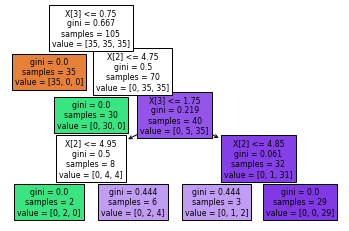

In [17]:
from sklearn import tree
tree.plot_tree(tree_model,  filled=True)

# Validation

In [13]:
from sklearn.metrics import accuracy_score
y_pred = tree_model.predict(X_test)
print('accuracy - ', accuracy_score(y_test, y_pred))

accuracy -  0.9777777777777777


# Predict

In [14]:
prediction = tree_model.predict([[6, 3, 5, 2]])
print(target_names[prediction])


['virginica']


In [15]:
print('For prediction enter features')
F = []
for name in feature_names:
  f = float(input(name))
  F.append(f)
prediction = tree_model.predict(np.asarray(F).reshape(1,-1))
print('Features: ', F, ' Predict - ', target_names[prediction])

For prediction enter features
sepal length (cm)5
sepal width (cm)3
petal length (cm)1
petal width (cm)0.2
Features:  [5.0, 3.0, 1.0, 0.2]  Predict -  ['setosa']
